In [1]:
import tensorflow as tf

In [2]:
X = tf.range(0, 100, 2)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98],
      dtype=int32)>

In [3]:
y = 2*X + 3
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([  3,   7,  11,  15,  19,  23,  27,  31,  35,  39,  43,  47,  51,
        55,  59,  63,  67,  71,  75,  79,  83,  87,  91,  95,  99, 103,
       107, 111, 115, 119, 123, 127, 131, 135, 139, 143, 147, 151, 155,
       159, 163, 167, 171, 175, 179, 183, 187, 191, 195, 199], dtype=int32)>

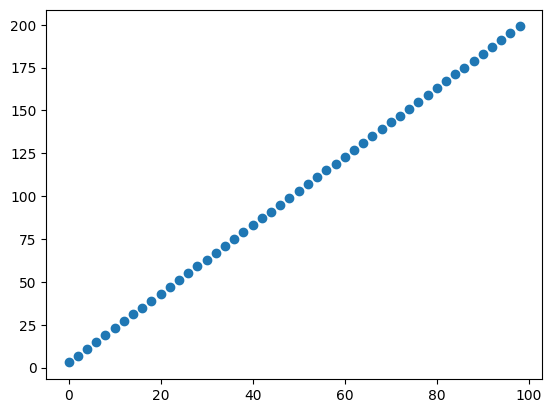

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.show()

## Model Creation

In [5]:
# Create a simple sequential model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(0.01),
              metrics=['mae'])

# Fit the model
model.fit(X, y, epochs=50)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 100.2695 - mae: 100.2695 
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 90.6524 - mae: 90.6524
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 84.9636 - mae: 84.9636
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 76.8519 - mae: 76.8519
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 69.5779 - mae: 69.5779
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 66.9096 - mae: 66.9096
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 58.3847 - mae: 58.3847
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 50.2651 - mae: 50.2651
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 43.5219 - mae: 43.5219
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 35.9451 - mae: 35.9451
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 28.3699 - mae: 28.3699
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 20.6434 - mae: 20.6434
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━

In [13]:
model.predict(tf.constant([[150.0], [-10]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[305.9723  ],
       [-17.984318]], dtype=float32)

In [14]:
X=150
y = 2*X + 3
y

303

In [15]:
X=-10
y = 2*X + 3
y

-17

#### save model using the SavedModel format

In [17]:
model.save("my_model_SavedModel_format.keras")

#### save model using the HDF5 format

In [18]:
model.save("my_model_HDF5_format.h5")

## Load model using SavedModel format

In [19]:
import tensorflow as tf
loaded_SavedModel_format = tf.keras.models.load_model("my_model_SavedModel_format.keras")

In [20]:
loaded_SavedModel_format.predict(tf.constant([[150.0], [-10]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([[305.9723  ],
       [-17.984318]], dtype=float32)

In [21]:
loaded_SavedModel_format.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95 (384.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64 (260.00 B)

## Load model using HDF5 format

In [22]:
import tensorflow as tf
loaded_HDF5_format = tf.keras.models.load_model("my_model_HDF5_format.h5")

In [23]:
loaded_SavedModel_format.predict(tf.constant([[150.0], [-10]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[305.9723  ],
       [-17.984318]], dtype=float32)

In [24]:
loaded_SavedModel_format.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95 (384.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64 (260.00 B)